### Autoencoders are a type of neural network that learns to compress and reconstruct input data. An autoencoder consists of two main components: an encoder and a decoder. The encoder maps the input data into a lower-dimensional space, known as the latent space, while the decoder reconstructs the input data from the compressed representation.
### Autoencoders are trained to minimize the reconstruction error, which measures the difference between the original input and the reconstructed output. They can be used for tasks like dimensionality reduction, feature extraction, and denoising.

In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### First, let's create a helper function to generate synthetic dataset

In [15]:
def generate_synthetic_data():
    """
    Generate synthetic data
    """
    data = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], 500)
    return torch.from_numpy(data).float()

### Let's also create the helper function to visualize the data

In [16]:
def visualize_data(data):
    """
    Visualize the data
    """
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### Now let's define simple autoencoder model

In [17]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            # nn.ReLU(True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Next, let's create the training loop function
### This example demonstrates a simple autoencoder for 2D data in PyTorch. The autoencoder has a single-layer encoder and decoder with ReLU activation functions. The encoder maps the input 2D points into a 1D latent space, and the decoder reconstructs the points from the latent space. The model is trained using the mean squared error (MSE) loss for 5000 epochs.

In [18]:
def train_autoencoder(data, hidden_dim, num_epochs):
    """
    Train the autoencoder
    """
    # define the autoencoder
    autoencoder = AutoEncoder(input_dim=2, hidden_dim=hidden_dim).to(device)

    # define the loss function and the optimizer
    criterion = nn.MSELoss()
    criterion = criterion.to(device)
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)
    data = data.to(device)
    # train the autoencoder
    for epoch in range(num_epochs):
        # convert the data into torch tensors


        # forward pass
        outputs = autoencoder(data)
        loss = criterion(outputs, data)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print the loss
        if (epoch + 1) % 1000 == 0:
            print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    return autoencoder

### let's generate the synthetic data and visualize it

torch.Size([500, 2])


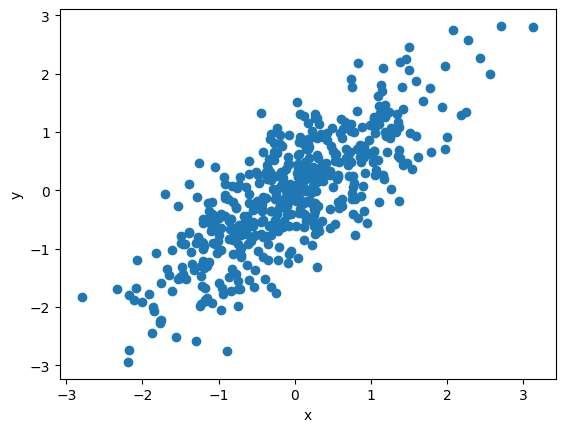

In [19]:
data = generate_synthetic_data()
print(data.shape)
visualize_data(data)

### let's train the model now

In [20]:
model = train_autoencoder(data, hidden_dim=1, num_epochs=30000)

Epoch: 1000/30000, Loss: 0.9354
Epoch: 2000/30000, Loss: 0.1858
Epoch: 3000/30000, Loss: 0.1191
Epoch: 4000/30000, Loss: 0.1051
Epoch: 5000/30000, Loss: 0.1005
Epoch: 6000/30000, Loss: 0.0993
Epoch: 7000/30000, Loss: 0.0987
Epoch: 8000/30000, Loss: 0.0984
Epoch: 9000/30000, Loss: 0.0983
Epoch: 10000/30000, Loss: 0.0983
Epoch: 11000/30000, Loss: 0.0982
Epoch: 12000/30000, Loss: 0.0982
Epoch: 13000/30000, Loss: 0.0982
Epoch: 14000/30000, Loss: 0.0982
Epoch: 15000/30000, Loss: 0.0982
Epoch: 16000/30000, Loss: 0.0982
Epoch: 17000/30000, Loss: 0.0982
Epoch: 18000/30000, Loss: 0.0982
Epoch: 19000/30000, Loss: 0.0982
Epoch: 20000/30000, Loss: 0.0982
Epoch: 21000/30000, Loss: 0.0982
Epoch: 22000/30000, Loss: 0.0982
Epoch: 23000/30000, Loss: 0.0982
Epoch: 24000/30000, Loss: 0.0982
Epoch: 25000/30000, Loss: 0.0982
Epoch: 26000/30000, Loss: 0.0982
Epoch: 27000/30000, Loss: 0.0982
Epoch: 28000/30000, Loss: 0.0982
Epoch: 29000/30000, Loss: 0.0982
Epoch: 30000/30000, Loss: 0.0982


In [21]:
# Reconstruct the dataset using the trained autoencoder
data_input = data.to(device)
reconstructed_data = model(data_input).detach().cpu().numpy()

# Visualize the reconstructed dataset

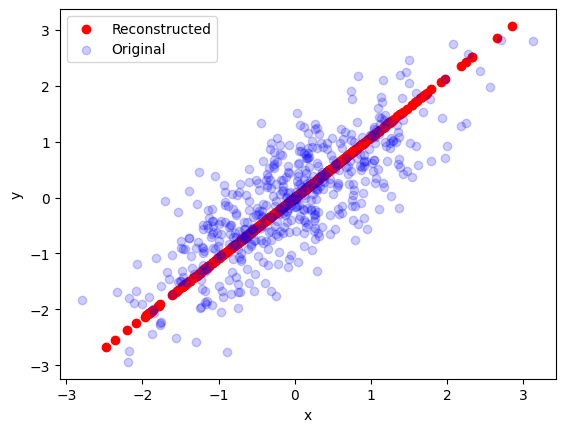

In [22]:
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='r', label='Reconstructed')
plt.scatter(data[:, 0], data[:, 1], c='b', alpha=0.2, label='Original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()